# 4-6. Logistic Regression Neuron으로 단일층 신경망을 만들자

In [1]:
from sklearn.datasets import load_breast_cancer

In [6]:
cancer = load_breast_cancer()

In [8]:
x = cancer.data
y = cancer.target

In [13]:
from sklearn.model_selection import train_test_split
import numpy as np

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size = 0.2, random_state = 42)

In [15]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(455, 30) (455,) (114, 30) (114,)


In [18]:
print(np.unique(y_train, return_counts = True))
print(np.unique(y_test, return_counts = True))

(array([0, 1]), array([170, 285]))
(array([0, 1]), array([42, 72]))


In [20]:
x_train[:1]

array([[1.032e+01, 1.635e+01, 6.531e+01, 3.249e+02, 9.434e-02, 4.994e-02,
        1.012e-02, 5.495e-03, 1.885e-01, 6.201e-02, 2.104e-01, 9.670e-01,
        1.356e+00, 1.297e+01, 7.086e-03, 7.247e-03, 1.012e-02, 5.495e-03,
        1.560e-02, 2.606e-03, 1.125e+01, 2.177e+01, 7.112e+01, 3.849e+02,
        1.285e-01, 8.842e-02, 4.384e-02, 2.381e-02, 2.681e-01, 7.399e-02]])

In [32]:
class SingleLayer:
  def __init__(self):
    self.w = None
    self.b = None
    self.losses = []    # loss 담을 list

  def forward(self, x):
    z = np.sum(self.w * x) + self.b
    return z

  def backprop(self, x, err):
    w_grad = x * err
    b_grad = 1 * err
    return w_grad, b_grad

  def fit(self, x, y, epochs = 100):
    self.w = np.ones(x.shape[1])
    self.b = 0
    for i in range(epochs):
      loss = 0
      indexes = np.random.permutation(np.arange(len(x)))    # x의 순서를 바꾸기 보다는 index를 이용해 x를 무작위로 뽑자!
                                                            # np.arange(): 지정된 범위 내의 숫자 배열을 생성
                                                            # np.random.permutation(): 입력 배열의 요소를 무작위로 섞는다.
      for idx in indexes:
        z = self.forward(x[idx])
        a = self.activation(z)
        err = -(y[idx] - a)
        w_grad, b_grad = self.backprop(x[idx], err)
        self.w -= w_grad
        self.b -= b_grad
        a = np.clip(a, 1e-10, 1 - 1e-10)    # loss 계산시, log를 만족하기 위해 1x10^(-10) < a < 1 - 1x10^(-10)으로 범위 변환
        loss += -(y[idx] * np.log(a) + (1 - y[idx]) * np.log(1 - a))    # BCE Loss (= Logistic Loss)
      self.losses.append(loss / len(y))       # 모든 Data의 loss를 평균내어 저장

  def activation(self, z):
    a = 1 / (1 + np.exp(-z))
    return a

  def predict(self, x_test):
    z = [self.forward(x_i) for x_i in x_test]
    # a = self.activation(np.array(z))    # z만 보고도 예측값 알 수 있기 때문에, 굳이 활성화 함수 적용 x (계산량 감소)
    return np.array(z) > 0                # z > 0 == a > 0.5 and z < 0 == a < 0.5

  def score(self, x_test, y_test):        # 예측의 정확도 계산하는 함수
    return np.mean(self.predict(x_test) == y_test)

In [34]:
layer = SingleLayer()

In [35]:
layer.fit(x_train, y_train)

<ipython-input-32-4cbe3355a8b4>:36: RuntimeWarning: overflow encountered in exp
  a = 1 / (1 + np.exp(-z))


In [36]:
layer.score(x_test, y_test)

0.9298245614035088

In [37]:
import matplotlib.pyplot as plt

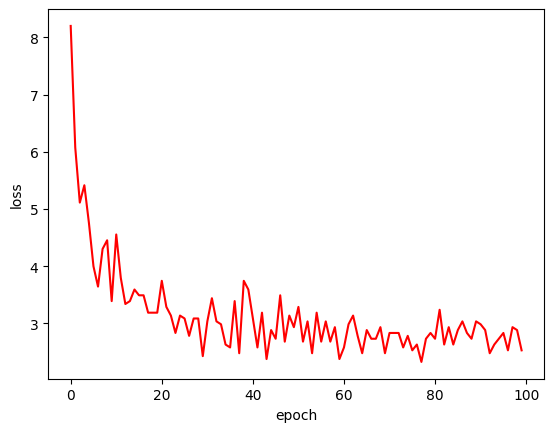

In [39]:
plt.plot(layer.losses, color = 'red')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 4-7. sklearn으로 Logistic Regression 수행하자

In [41]:
from sklearn.linear_model import SGDClassifier  # Gradient Descent Classifier (경사 하강법 분류기)

In [44]:
model = SGDClassifier(loss = 'log_loss', max_iter = 100, tol = 1e-3, random_state = 42)
# loss = 'log_loss'로 지정하면 BCE(=Logistic Loss)를 이용해 Logistic Regression 수행
# max_iter: epoch 지정
# tol: loss 변화가 없을때 언제쯤 학습을 종료할지 결정
# random_state: Sample을 무작위로 뽑기 위해

In [45]:
model.fit(x_train, y_train)

SGDClassifier(loss='log_loss', max_iter=100, random_state=42)

In [46]:
model.score(x_test, y_test)

0.8333333333333334

In [48]:
model.predict(x_test)

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1])